<a href="https://colab.research.google.com/github/barbacba/tpFinalCienciaDeDatos-/blob/main/TPFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP FINAL

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.

**Ejercicio 4**\
Detectar Valores Ausente  y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

###Resolución

####**Ejercicio 1 y 2**

Para este trabajo práctico analizaremos un dataframe sobre el Coronavirus.
Este dataframe de la Organización Mundial de la Salud (OMS) sobre el coronavirus (COVID-19) presenta recuentos diarios oficiales de casos de COVID-19, fallecimientos y utilización de vacunas informados por países, territorios y áreas. A través de este panel de control, su objetivo es proporcionar una forma visualización de datos, sobre lo que fue el COVID-19.

**Cuenta con las siguientes variables:**

* País (Country, Other) = nombre del país. Variable categórica.

* Casos Totales (Total Cases) = recuento acumulativo total reportado de casos detectados y confirmados como positivos por laboratorio y
a veces, según las normas de informe del país, también casos presuntivos, sospechosos o probables de infección detectada.

* Recuperados (Recovered) = esta estadística es altamente imperfecta, debido a que los informes pueden faltar, ser incompletos, incorrectos, basados en diferentes definiciones o estar desactualizados (o una combinación de todas estas situaciones) en muchos gobiernos, tanto a nivel local como nacional, a veces con diferencias entre estados dentro del mismo país o condados dentro del mismo estado. La OMS recomienda seguir los criterios de [resolución de síntomas + 2 pruebas negativas en 24 horas] o [resolución de síntomas + 14 días adicionales], pero esto es solo una recomendación. En algunos países, cuando un paciente es dado de alta del hospital, se le cuenta como "recuperado" incluso si no se realiza ninguna prueba. Algunos funcionarios de salud consideran ahora que cualquier persona diagnosticada con COVID-19 hace tres o más semanas y que no ha fallecido se ha recuperado de la enfermedad. Teniendo en cuenta esto, "Casos Activos" y "Resultado de Casos Cerrados", que dependen de la cantidad de recuperaciones, pueden verse afectados por esta deficiencia inherente en muchos países y para el recuento mundial total.

* Muertes Totales (Total Deaths) = número acumulativo de muertes entre casos detectados.

* Casos Totales por millón de habitantes (Total Cases/1M pop) : ((casos totales) / (población)) * 1 millón.
Es una media que se puede usar de referencia para comparar unos países con otros países.

*  Población (Population ) = número de habitantes en el país seleccionado.

* Test Total (Total Recovered) : número total de test realizados.

* Muertes Totales por millón de habitantes (Deaths/1M pop): proporción de la cantidad de muertes por cada millón de habitantes.
*Total de pruebas realizadas (Total Tests): número de test realizados.
* Pruebas por cada millón de habitantes (Tests/1M pop) :  número de test realizados por cada millón de habitantes.

.  \
  \
| Fuente: https://www.kaggle.com/datasets/chitrakumari25/corona-virus-latest-data-2023
  \
  \
####**Ejercicio 3**
 \
La clasificación de las variables presentes en el dataset es la siguiente:

•	Variables Categóricas:

  -	País: Categórica Nominal (representa países). Ya que las categorías en esta variable no tienen un orden específico

•	Variables Numéricas Continuas:

  Las variables continuas son aquellas que pueden tomar un número infinito de valores dentro de un rango. En este caso, estas variables pueden tener números decimales, lo que las hace continuas. Dentro de este dataset se encuentran las siguientes variables que cumplen con esas condiciones:
  -	Casos Totales
  -	Muertes Totales

• Variables Numéricas Discretas:

  Las variables discretas son aquellas que toman valores específicos y aislados, generalmente enteros, y no pueden tener valores fraccionarios. Dentro de este dataset se encuentran las siguientes variables que cumplen con esas condiciones:
  - Nuevos Casos
  - Nuevas Muertes
  - Recuperados Totales
  - Nuevas Recuperaciones
  - Casos Activos
  - Casos Graves o Críticos
  - Pruebas Totales

•	Variables Numéricas de Proporción:

Las variables de proporción representan relaciones relativas entre dos cantidades y se expresan comúnmente en términos de partes por millón o porcentajes para facilitar la comparación. Dentro de este dataset se encuentran las siguientes variables que cumplen con esas condiciones:

  - Casos Totales/1M habitantes

  - Muertes/1M habitantes

  - Pruebas/1M habitantes


**Ejercicio 4**

Las variables nuevos casos, nuevas muertes, nuevos recuperados, serios, Críticos, Casos activos, son variables dinámicas que implican el relevo constante de información, manteniendo los datos en tiempo real. Dado que el estudio de estos datos se está realizando pasada la emergencia sanitaria, actualmente no es tan exhaustivo y actualizado su relevamiento, por lo que no se mantienen los datos en tiempo real. Es por eso que se han desestimado estas variables con valores nulos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/barbacba/tpFinalCienciaDeDatos-/main/corona_virus.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country,Other       232 non-null    object 
 1   Total Cases         232 non-null    object 
 2   New Cases           5 non-null      object 
 3   Total Deaths        226 non-null    object 
 4   New Deaths          2 non-null      float64
 5   Total Recovered     211 non-null    object 
 6   New Recovered       12 non-null     object 
 7   Active Cases        213 non-null    object 
 8   Serious,Critical    127 non-null    object 
 9   Total Cases/1M pop  230 non-null    object 
 10  Deaths/1M pop       224 non-null    object 
 11  Total Tests         213 non-null    object 
 12  Tests/1M pop        213 non-null    object 
 13  Population          229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 25.5+ KB


In [ ]:
df_reducido=df.drop(labels=["New Cases","New Deaths","New Recovered","Serious,Critical","Active Cases"],axis=1)
df_final=df_reducido.dropna()
df_final

,"Country,Other",Total Cases,Total Deaths,Total Recovered,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"10,66,27,427","11,59,824","10,45,49,551","3,18,476","3,464","1,17,68,34,935","35,14,983","33,48,05,269"
1,India,"4,49,39,515","5,31,508","4,43,56,693","31,948",378,"92,64,96,579","6,58,663","1,40,66,31,776"
2,France,"3,99,80,570","1,66,556","3,96,77,000","6,09,604","2,540","27,14,90,188","41,39,547","6,55,84,518"
3,Germany,"3,84,03,667","1,73,044","3,81,92,900","4,57,821","2,063","12,23,32,384","14,58,359","8,38,83,596"
4,Brazil,"3,74,49,418","7,01,494","3,62,49,161","1,73,897","3,257","6,37,76,166","2,96,146","21,53,53,593"
...,...,...,...,...,...,...,...,...,...
217,Anguilla,"3,904",12,"3,879","2,56,336",788,"51,382","33,73,736","15,230"
218,Macao,"3,520",121,"3,396","5,273",181,"7,850","11,760","6,67,490"
219,Saint Pierre Miquelon,"3,452",2,"2,449","5,99,410",347,"25,400","44,10,488","5,759"
220,Wallis and Futuna,"3,427",7,438,"3,12,056",637,"20,508","18,67,419","10,982"


In [ ]:
def quitar_comas_de_enteros(df,columna):
  # Elimina las comas de la columna.
  df[columna] = df[columna].str.replace(",", '')
  # Convierte los valores de la columna a enteros.
  df[columna] = df[columna].astype(int)


In [ ]:
col_to_parse=["Total Cases",	"Total Deaths",	"Total Recovered",	"Total Cases/1M pop",	"Deaths/1M pop",	"Total Tests",	"Tests/1M pop",	"Population"]
for columna in col_to_parse:
  quitar_comas_de_enteros(df_final, columna)

<ipython-input-48-eb295531d6f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].str.replace(",", '')
<ipython-input-48-eb295531d6f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].astype(int)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 224
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country,Other       196 non-null    object
 1   Total Cases         196 non-null    int64 
 2   Total Deaths        196 non-null    int64 
 3   Total Recovered     196 non-null    int64 
 4   Total Cases/1M pop  196 non-null    int64 
 5   Deaths/1M pop       196 non-null    int64 
 6   Total Tests         196 non-null    int64 
 7   Tests/1M pop        196 non-null    int64 
 8   Population          196 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 15.3+ KB


###Ejercicio 5

In [ ]:
def bar_autolabel(rects):
  #Genera la etiqueta de arriba de las barras. recibe una lista de de objetos Rect
    for rect in rects:
        height = rect.get_height()
        plt.gca().annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
argentina = df_final[df_final['Country,Other'] == "Argentina"]


paises_mas_muertes_por_millon = df_final.sort_values("Deaths/1M pop", ascending=False).head()
muertes_por_millon = pd.concat([paises_mas_muertes_por_millon,argentina])
x_mxm = muertes_por_millon["Deaths/1M pop"]
mxm_labels = muertes_por_millon['Country,Other']


paises_mas_muertes_totales = df_final.sort_values("Total Deaths", ascending=False).head()
muertes_totales = pd.concat([paises_mas_muertes_totales,argentina])
x_mt = muertes_totales["Total Deaths"]
mt_labels = muertes_totales['Country,Other']

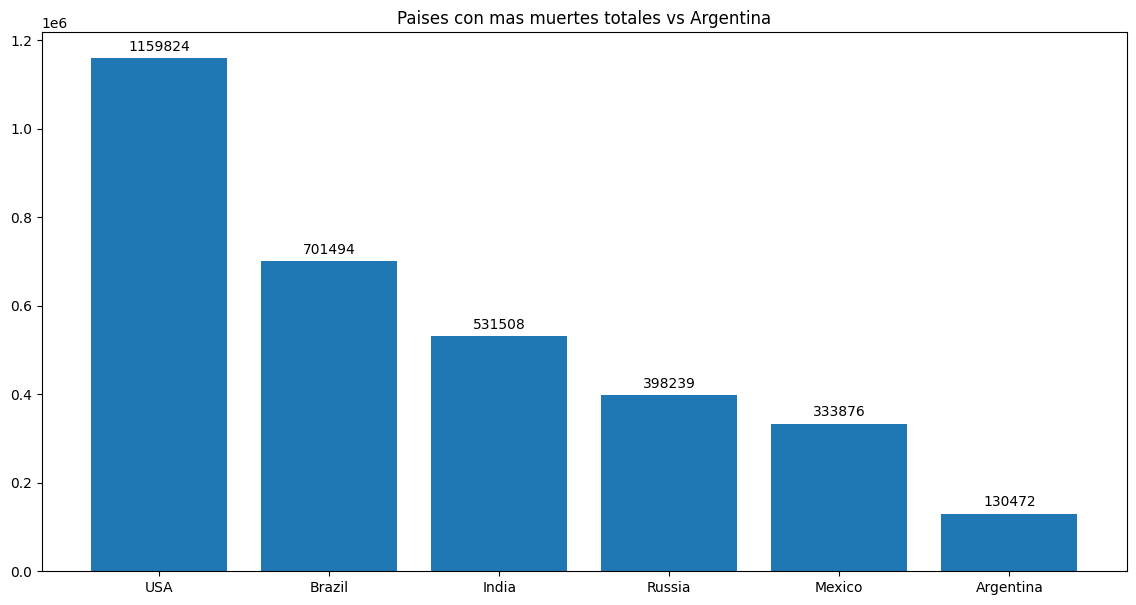

In [ ]:
plt.figure(figsize=(14,7))
rects=plt.bar(mt_labels,x_mt)
bar_autolabel(rects)
plt.title("Paises con mas muertes totales vs Argentina")
plt.show()

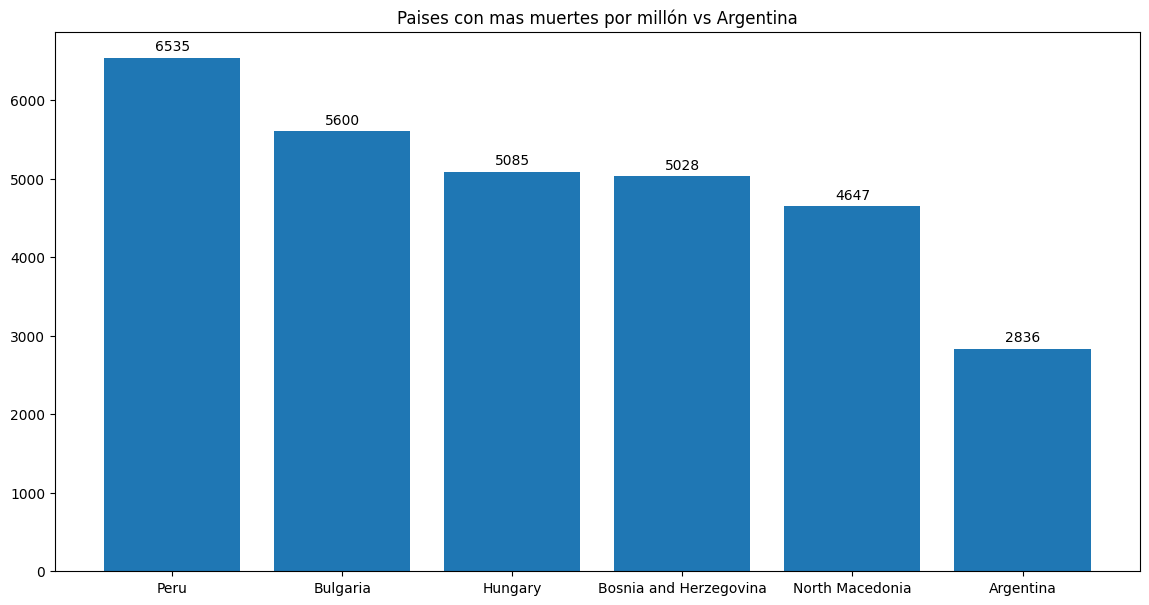

In [ ]:
plt.figure(figsize=(14,7))
rects=plt.bar(mxm_labels,x_mxm,)
bar_autolabel(rects)
plt.title("Paises con mas muertes por millón vs Argentina")
plt.show()

In [ ]:
todos= pd.concat([paises_mas_muertes_totales, argentina, paises_mas_muertes_por_millon])
df_sb_mt_todos=todos.sort_values("Total Deaths", ascending=False)
df_sb_mxm_todos=todos.sort_values("Deaths/1M pop", ascending=False)

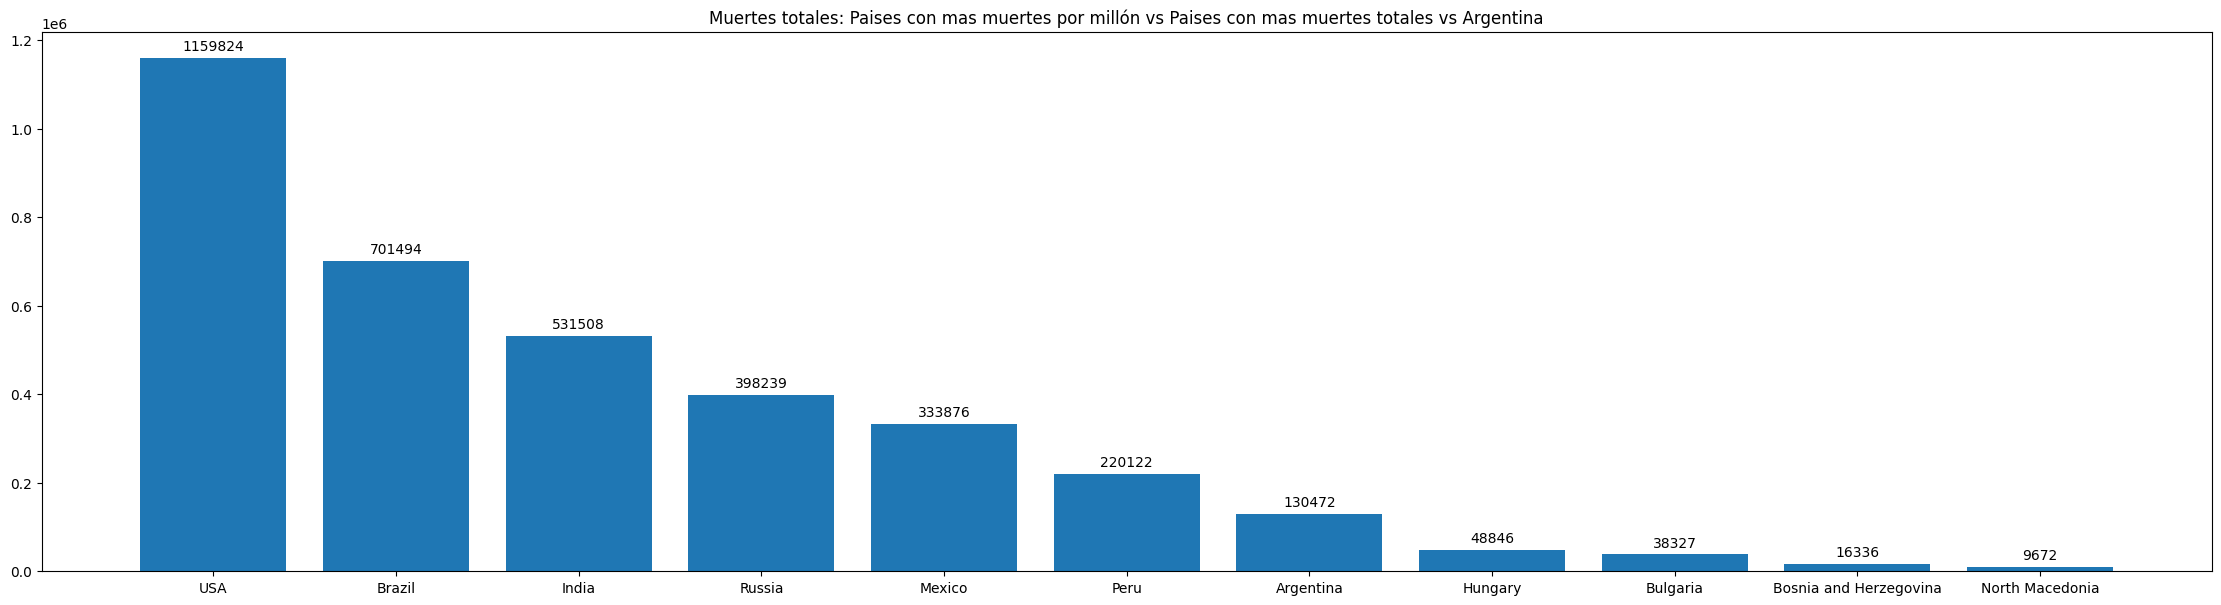

In [ ]:
todos_labels_mt = df_sb_mt_todos['Country,Other']
todos_values_mt = df_sb_mt_todos["Total Deaths"]
plt.figure(figsize=(28,7))
rects=plt.bar(todos_labels_mt,todos_values_mt)
bar_autolabel(rects)
plt.title("Muertes totales: Paises con mas muertes por millón vs Paises con mas muertes totales vs Argentina")
plt.show()

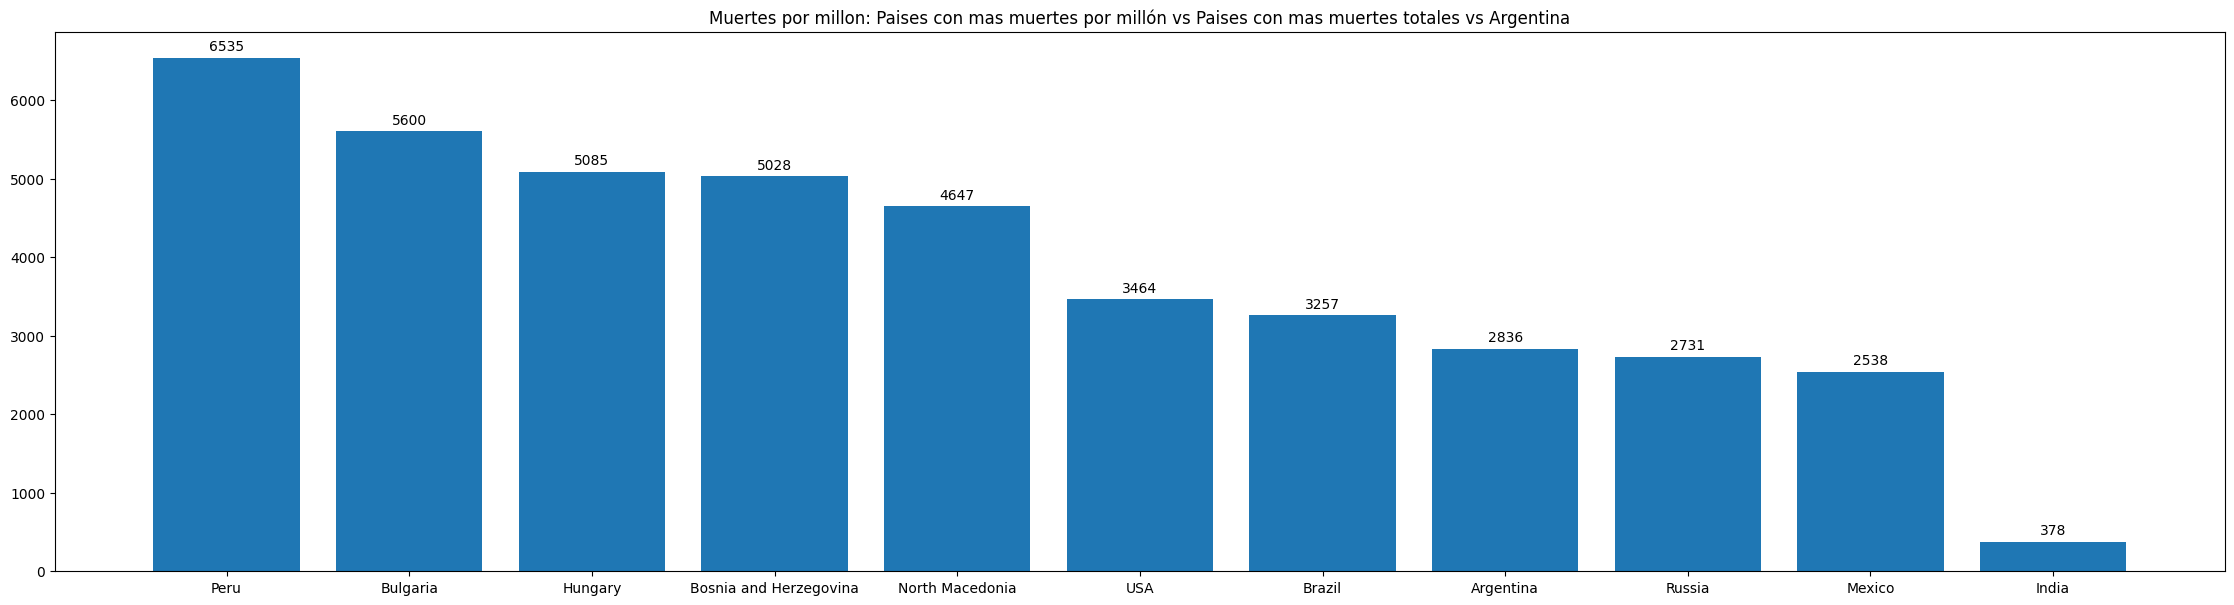

In [ ]:
todos_labels_mxm = df_sb_mxm_todos['Country,Other']
todos_values_mxm = df_sb_mxm_todos["Deaths/1M pop"]
plt.figure(figsize=(28,7))
rects=plt.bar(todos_labels_mxm,todos_values_mxm)
bar_autolabel(rects)
plt.title("Muertes por millon: Paises con mas muertes por millón vs Paises con mas muertes totales vs Argentina")
plt.show()

<ipython-input-110-8a3535714821>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_todos_sb_pob= primeros.append(otros,ignore_index=True)


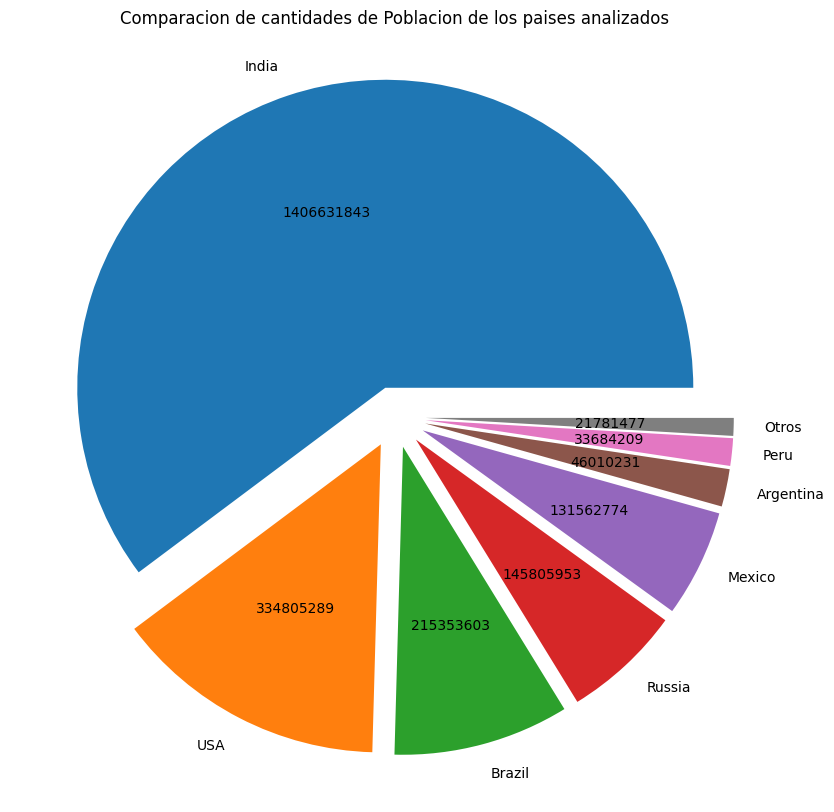

In [ ]:
df_sb_pob = todos.sort_values("Population", ascending=False)
primeros = df_sb_pob.head(7)
otros_value=df_sb_pob.tail(4)["Population"].sum()
otros = pd.Series({'Country,Other':"Otros","Population":otros_value})
df_todos_sb_pob= primeros.append(otros,ignore_index=True)
pob_nums = df_todos_sb_pob["Population"]
labels = df_todos_sb_pob['Country,Other']
explodes=[0.1 for n in range(len(labels))]
plt.figure(figsize=(10,10))
plt.pie(pob_nums, labels=labels,explode=explodes, autopct=lambda pct: f'{round(pct*pob_nums.sum()/100)}')
plt.title(f"Comparacion de cantidades de Poblacion de los paises analizados")
plt.show()

###Ejercicio 6

Text(0.5, 1.0, 'Correlaciones de variables')

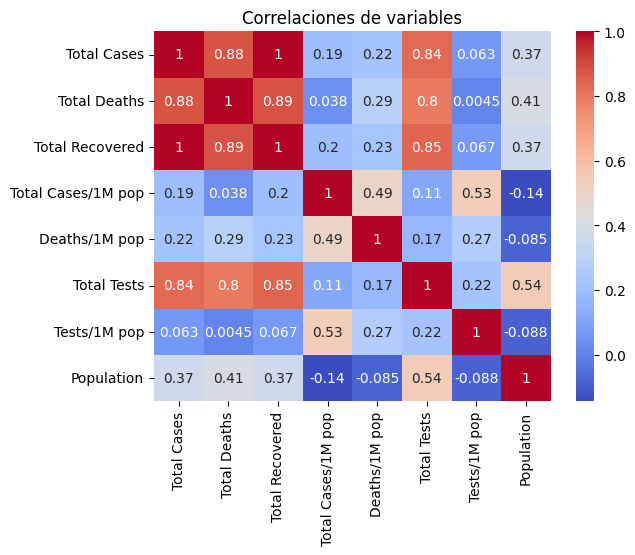

In [ ]:
sns.heatmap(df_final.corr(numeric_only=True),annot = True, cmap = 'coolwarm').set_title("Correlaciones de variables")

**Ejercicio 5**

**Conclusión**

El análisis univariado demuestra que tanto las muertes totales como  las  muertes totales por millón no son datos aptos para determinas qué pais tuvo mejor o peor desempeño en mitigar los efectos del coronavirus y que se pueden analizar más a fondo cada país por separado fijandose en 3 indicadores: población, muertes totales y muertes por millón de habitantes. \
En el caso de Argentina podemos ver que, a diferencia de Estados Unidos el total de muertes no representa una cantidad tan alarmante de decesos. En comparación a perú, pese a que nuestras poblaciones son similares, incluso mayor la argentina, las cantidades de fallecimientos son significativamente mayores.
Pero ¿Qué dato sería bueno al hablar de vidas humanas?
Lo importante en esto es recordar que las pandemias van a ser cada vez mas frecuentes sí el calentamiento global no para y que simples números difíciles de leer representan a familiares y conocidos que ya no estan para muchas familias.  

**Ejercicio 6**

**Conclusión**

Parece que se puede encontrar una correlación porque se encuentran valores mayores a 0.5 entre varias variables. Sabemos que la relación obtenida por el gráfico carece de sentido ya que la relación entre estas variables puede ser por error en el muestreo como previamente se especificó y casualidad en cuanto  a los reportes de unos paises respecto a los otros.
 \
 \
 \
####**Participantes:**
> Areosa, Fernando

> Collazo, Rocío

 \